In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv('.\data\labeled.csv')

In [3]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


Toxic column isn't have to be float. We can have it as int.

In [4]:
data.toxic = data.toxic.apply(int)

In [5]:
data.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


Let us see the distribution of the dataset

<AxesSubplot:>

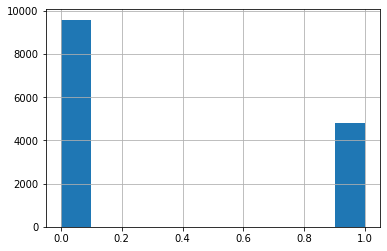

In [6]:
data.toxic.hist()

There are twice as many non-toxic ones as toxic.

Then we've got to make test dataset

Let's make it from our data with using train_test_split func.

In [7]:
data_train, data_test = train_test_split(data, random_state=0)

In [8]:
data_train.shape

(10809, 2)

In [9]:
data_test.shape

(3603, 2)

Here we've got to make sure that the distribution of our 'data_test' is the same as the distribution of 'data_train'

In [10]:
data_train.toxic.value_counts()

0    7183
1    3626
Name: toxic, dtype: int64

In [11]:
data_test.toxic.value_counts()

0    2403
1    1200
Name: toxic, dtype: int64

Almost the same:) 

# Logistic regression is our tool today

Here we need some text preprocessing

#### Tokenizing

In [12]:
SnowBall = SnowballStemmer(language="russian")
Rus_stopwords = stopwords.words("russian")

def tokenize_and_stem_sentence(sentence):
    tokens = word_tokenize(sentence, language="russian")
    tokens_without_punc = [i for i in tokens if i not in string.punctuation]
    tokens_without_punc_and_stopwords = [i for i in tokens_without_punc if i not in Rus_stopwords]
    stemmed = [SnowBall.stem(i) for i in tokens_without_punc_and_stopwords]
    return stemmed

In [13]:
sentence_example = data.iloc[1].comment
tokens = word_tokenize(sentence_example, language = "russian")
tokens_without_punc = [i for i in tokens if i not in string.punctuation]
tokens_without_punc_and_stopwords = [i for i in tokens_without_punc if i not in stopwords.words("russian")]
SnowBall = SnowballStemmer(language="russian")
stemmed_tokens = [SnowBall.stem(i) for i in tokens_without_punc_and_stopwords]

In [14]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_and_stem_sentence(x))

In [15]:
features = vectorizer.fit_transform(data_train.comment)

It's time for LOGREG :)

In [16]:
model = LogisticRegression(random_state = 0)

In [17]:
model.fit(features, data_train.toxic)

LogisticRegression(random_state=0)

In [18]:
model.predict(features[112])

array([0], dtype=int64)

In [19]:
data_train.iloc[112].toxic

0

It is not very convinient as it could be... Let us make pipeline!

In [20]:
model_pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("model", model)
])

In [21]:
model_pipeline.fit(data_train.comment, data_train.toxic)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002C139832940>)),
                ('model', LogisticRegression(random_state=0))])

After learning step, let's check if the model works correctly

In [22]:
model_pipeline.predict(["Как у тебя дела, друг мой?"])

array([0], dtype=int64)

In [23]:
model_pipeline.predict(["Я ненавижу тебя"])

array([1], dtype=int64)

Now we have reached correctly working model. Our next step is to find out some metrics of the model.

In [24]:
precision_score(y_true=data_test.toxic, y_pred=model_pipeline.predict(data_test.comment))

0.90875

In [25]:
recall_score(y_true=data_test.toxic, y_pred=model_pipeline.predict(data_test.comment))

0.6058333333333333

We need precision to be above 0.95

    Let us make it happen:

In [26]:
prec, rec, thresholds = precision_recall_curve(y_true=data_test.toxic, probas_pred=model_pipeline.predict_proba(data_test.comment)[:,1])

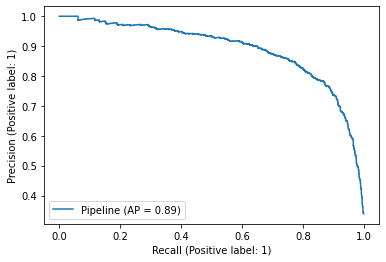

In [27]:
plot_precision_recall_curve(estimator=model_pipeline, X=data_test.comment, y=data_test.toxic)

In [28]:
np.where(prec>0.95)

(array([3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034,
        3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045,
        3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056,
        3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067,
        3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078,
        3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089,
        3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100,
        3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111,
        3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122,
        3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133,
        3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144,
        3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155,
        3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166,
        3167, 3168, 3169, 3170, 3171, 

In [29]:
precision_score(y_true=data_test.toxic, y_pred=model_pipeline.predict_proba(data_test.comment)[:, 1]>thresholds[3024])

0.9513184584178499

In [30]:
recall_score(y_true=data_test.toxic, y_pred=model_pipeline.predict_proba(data_test.comment)[:, 1]>thresholds[3024])

0.3908333333333333

Here we need to get some improvements in recall metrics, so let's use GridSearch

In [31]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_and_stem_sentence(x))),
    ("model", GridSearchCV(LogisticRegression(random_state=0), param_grid={'C':[0.1, 1, 10.]},
                          cv=3, verbose=4))
])

In [32]:
grid_pipeline.fit(data_train.comment, data_train.toxic)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.676 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.677 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.676 total time=   0.0s
[CV 1/3] END ...............................C=1;, score=0.817 total time=   0.3s
[CV 2/3] END ...............................C=1;, score=0.836 total time=   0.1s
[CV 3/3] END ...............................C=1;, score=0.823 total time=   0.2s


c:\users\msi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.854 total time=   0.5s


c:\users\msi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.865 total time=   0.5s


c:\users\msi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ............................C=10.0;, score=0.858 total time=   0.4s


c:\users\msi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002C139832160>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [33]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", vectorizer),
    ("model", LogisticRegression(random_state=0, C=10.))
])

In [34]:
model_pipeline_c_10.fit(data_train.comment, data_train.toxic)

c:\users\msi\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002C139832940>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [35]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=data_test.toxic, probas_pred=model_pipeline_c_10 .predict_proba(data_test.comment)[:,1])

In [36]:
np.where(prec_c_10>0.95)

(array([2932, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946,
        2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957,
        2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968,
        2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979,
        2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990,
        2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001,
        3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012,
        3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023,
        3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034,
        3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045,
        3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056,
        3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067,
        3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078,
        3079, 3080, 3081, 3082, 3083, 

In [37]:
precision_score(y_true=data_test.toxic, y_pred=model_pipeline_c_10.predict_proba(data_test.comment)[:, 1]>thresholds_c_10[2932])

0.95

In [38]:
recall_score(y_true=data_test.toxic, y_pred=model_pipeline_c_10.predict_proba(data_test.comment)[:, 1]>thresholds_c_10[2932])

0.44333333333333336

!We've got working model (model_pipeline_c_10)!

In [39]:
model_pipeline_c_10.predict(["Я люблю тебя"])

array([0], dtype=int64)

In [40]:
model_pipeline.predict(["Чел, ты очень странный тип, тебе бы в психушку"])

array([1], dtype=int64)